In [1]:
# kaggle competition - https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

## Import libraries

In [2]:
# basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [3]:
train_dir = './house-prices-advanced-regression-techniques/train.csv'
test_dir = './house-prices-advanced-regression-techniques/test.csv'

In [4]:
train_df = pd.read_csv(train_dir)
test_df = pd.read_csv(test_dir)

In [5]:
# dataset shape
print(f'Dataset shape: {train_df.shape}\n')
print(f'List of features: {train_df.columns.values}\n')

# dataset shape
print(f'Dataset shape: {test_df.shape}\n')
print(f'List of features: {test_df.columns.values}')

Dataset shape: (1460, 81)

List of features: ['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'Misc

In [6]:
train_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

overview of the features and values

In [9]:
train_df.describe(include='number')

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [10]:
train_df.describe(include='object')

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

## Data Preprocessing

#### rearrange the loaded data
- separate the y values (SalePrice)
- concat train and test data for handling 'noise' and null values
        ref (https://www.kaggle.com/code/niteshx2/top-50-beginners-stacking-lgb-xgb?cellIds=24&kernelSessionId=11631561)
- delete 'Id' columns

In [11]:
y_prices = train_df['SalePrice']
train_features = train_df.drop(['SalePrice'], axis = 1)
x_features = pd.concat([train_features, test_df]).reset_index(drop=True)
x_features = x_features.drop(columns = 'Id', axis = 1)

In [12]:
x_features.shape

(2919, 79)

#### dealing with NaN values
- finding the null values
- filling those values with appropriate values

In [13]:
y_prices.isnull().sum(), y_prices.min(), y_prices.max()

(0, 34900, 755000)

In [14]:
# find all the features with Nan values
null_cols = [] # list of feature/column names with NaN values
for cols in list(x_features.columns):
    if x_features[cols].isnull().sum() != 0:
        null_cols.append(cols)
        print(cols, ': ', x_features[cols].isnull().sum())

MSZoning :  4
LotFrontage :  486
Alley :  2721
Utilities :  2
Exterior1st :  1
Exterior2nd :  1
MasVnrType :  1766
MasVnrArea :  23
BsmtQual :  81
BsmtCond :  82
BsmtExposure :  82
BsmtFinType1 :  79
BsmtFinSF1 :  1
BsmtFinType2 :  80
BsmtFinSF2 :  1
BsmtUnfSF :  1
TotalBsmtSF :  1
Electrical :  1
BsmtFullBath :  2
BsmtHalfBath :  2
KitchenQual :  1
Functional :  2
FireplaceQu :  1420
GarageType :  157
GarageYrBlt :  159
GarageFinish :  159
GarageCars :  1
GarageArea :  1
GarageQual :  159
GarageCond :  159
PoolQC :  2909
Fence :  2348
MiscFeature :  2814
SaleType :  1


In [15]:
# separating numeric and categorical features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_null_cols = list(train_df[null_cols].select_dtypes(numerics).columns)
cat_null_cols = list(train_df[null_cols].select_dtypes('object').columns)

num_null_cols, cat_null_cols

(['LotFrontage',
  'MasVnrArea',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  'BsmtFullBath',
  'BsmtHalfBath',
  'GarageYrBlt',
  'GarageCars',
  'GarageArea'],
 ['MSZoning',
  'Alley',
  'Utilities',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Electrical',
  'KitchenQual',
  'Functional',
  'FireplaceQu',
  'GarageType',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PoolQC',
  'Fence',
  'MiscFeature',
  'SaleType'])

CATEGORICAL FEATURES WITH NULL VALUES
<br>ref: https://www.kaggle.com/code/niteshx2/top-50-beginners-stacking-lgb-xgb?cellIds=31&kernelSessionId=11631561
- fill with 'NA' or 'None' value
    - 'NA'
        - 'Alley' (Type of alley access to property)
        - 'BsmtQual' (Evaluates the height of the basement))
        - 'BsmtCond' (Evaluates the general condition of the basement)
        - 'BsmtExposure' (Refers to walkout or garden level walls)
        - 'BsmtFinType1' (Rating of basement finished area)
        - 'BsmtFinType2' (Rating of basement finished area (if multiple types))
        - 'FireplaceQu' (Fireplace quality)
        - 'GarageType' (Garage location)
        - 'GarageFinish' (Interior finish of the garage)
        - 'GarageQual' (Garage quality)
        - 'GarageCond' (Garage condition)
        - 'PoolQC' (Pool quality)
        - 'Fence' (Fence quality)
        - 'MiscFeature' (Miscellaneous feature not covered in other categories)
    - 'None'
        - 'Utilities' (Type of utilities available)
        - 'MasVnrType' (Masonry veneer type)
- Most frequent value (mode)
    - 'MSZoning' (Identifies the general zoning classification of the sale) : similar MSSubClasses will have similar MSZoning
    - 'Exterior1st' (Exterior covering on house)
    - 'Exterior2nd' (Exterior covering on house (if more than one material))
- fill with appropriately specific value
    - 'Electrical' (Electrical system) : 'SBrkr'
    - 'KitchenQual' (Kitchen quality) : 'TA'
    - 'Functional' (Home functionality (Assume typical unless deductions are warranted)) : 'Typ'
      'SaleType' (Type of sale) : 'Oth'


In [16]:
## fill with 'NA' or 'None'
for col in ('Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
            'Fence', 'MiscFeature'):
    x_features[col] = x_features[col].fillna('NA')

for col in ('Utilities', 'MasVnrType'):
    x_features[col] = x_features[col].fillna('None')

In [17]:
## most frequent value
x_features['MSZoning'] = x_features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

x_features['Exterior1st'] = x_features['Exterior1st'].fillna(x_features['Exterior1st'].mode()[0]) 
x_features['Exterior2nd'] = x_features['Exterior2nd'].fillna(x_features['Exterior2nd'].mode()[0])

In [18]:
## fill with appropriately specific value
x_features['Electrical'] = x_features['Electrical'].fillna('SBrkr') 
x_features['KitchenQual'] = x_features['KitchenQual'].fillna('TA') 
x_features['Functional'] = x_features['Functional'].fillna('Typ') 
x_features['SaleType'] = x_features['SaleType'].fillna('Oth') 

NUMERICAL FEATURES WITH NULL VALUES
- fill with appropriately specific value
    - 'LotFrontage' (Linear feet of street connected to property) : appropriate to fill in with Median value according to the 'Neighborhood' type
    - 'MasVnrArea' (Masonry veneer area in square feet) : 'MasVnrType' value is 'nan' then MasVnrArea also filled as 0, if not, fill in with median value of each 'MasVnrType'
    - 'BsmtFinSF1' (Type 1 finished square feet) : if 'BsmtFinType1' value is 'nan' then MasVnrArea also filled as 0, if not, fill in with median value of each 'BsmtFinType1'
    - 'BsmtFinSF2'  (Type 2 finished square feet) : if 'BsmtFinType2' value is 'nan' then MasVnrArea also filled as 0, if not, fill in with median value of each 'BsmtFinType2'
- fill with 0 (with additional condition)
    - 'BsmtUnfSF' (Unfinished square feet of basement area)
    - 'TotalBsmtSF' (Total square feet of basement area)
    - 'BsmtFullBath' (Basement full bathrooms)
    - 'BsmtHalfBath' (Basement half bathrooms)
    - 'GarageYrBlt' (Year garage was built)
    - 'GarageCars' (Size of garage in car capacity)
    - 'GarageArea' (Size of garage in square feet)


In [19]:
## fill with appropriately specific value
x_features['LotFrontage'] = x_features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
x_features['MasVnrArea'] = x_features.groupby('MasVnrType')['MasVnrArea'].transform(lambda x: x.fillna(x.median()))
x_features['BsmtFinSF1'] = x_features.groupby('BsmtFinType1')['BsmtFinSF1'].transform(lambda x: x.fillna(x.median()))
x_features['BsmtFinSF2'] = x_features.groupby('BsmtFinType2')['BsmtFinSF2'].transform(lambda x: x.fillna(x.median()))

In [20]:
## fill with 0 (with additional condition)
for col in ('BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
           'GarageYrBlt', 'GarageCars', 'GarageArea'):
    x_features[col] = x_features[col].fillna(0)

In [21]:
# checking for any more nan values
for col in x_features.columns:
    if x_features[col].isnull().sum() == 0:
        continue
    else:
        print(f'still nan value left: {col}')

#### make numerical features into categorical ones
ref: https://www.kaggle.com/code/niteshx2/top-50-beginners-stacking-lgb-xgb?scriptVersionId=11631561&cellId=28

In [22]:
x_features['MSSubClass'] = x_features['MSSubClass'].apply(str)
x_features['YrSold'] = x_features['YrSold'].astype(str)
x_features['MoSold'] = x_features['MoSold'].astype(str)
# x_features['YearBuilt'] = x_features['YearBuilt'].apply(str)
# x_features['YearRemodAdd'] = x_features['YearRemodAdd'].astype(str)
# x_features['GarageYrBlt'] = x_features['GarageYrBlt'].astype(str)

#### visualization of numeric and categorical features

In [23]:
# setting sns plot settings
sns.set(style='whitegrid')
palette = sns.color_palette() #https://seaborn.pydata.org/generated/seaborn.color_palette.html

In [24]:
# separating numeric and categorical features
num_cols = list(x_features.select_dtypes(numerics).columns)
cat_cols = list(x_features.select_dtypes('object').columns)

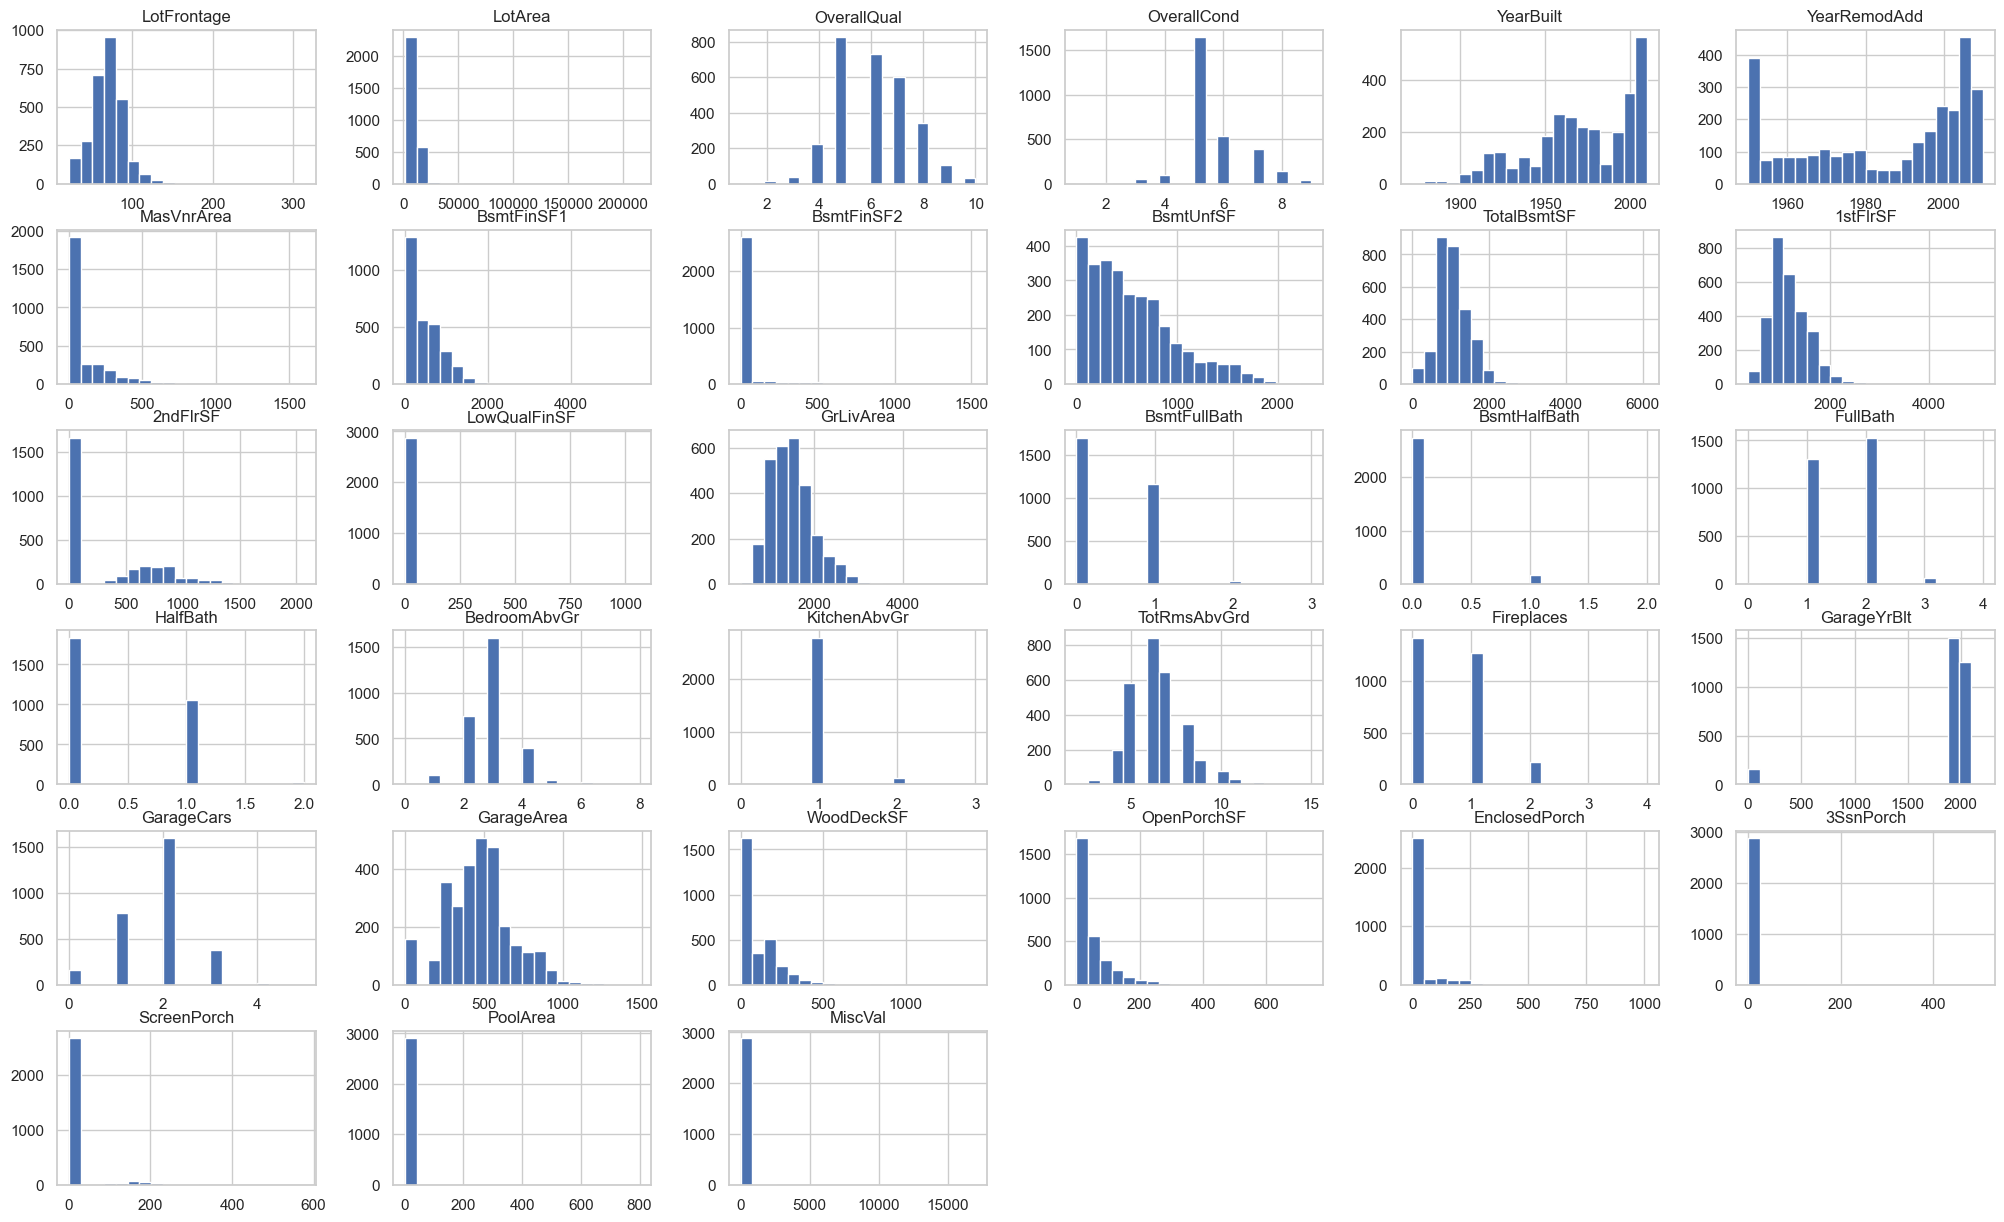

In [25]:
#numeric features
x_features[num_cols].hist(bins = 20, figsize = (25, 15))
plt.show()

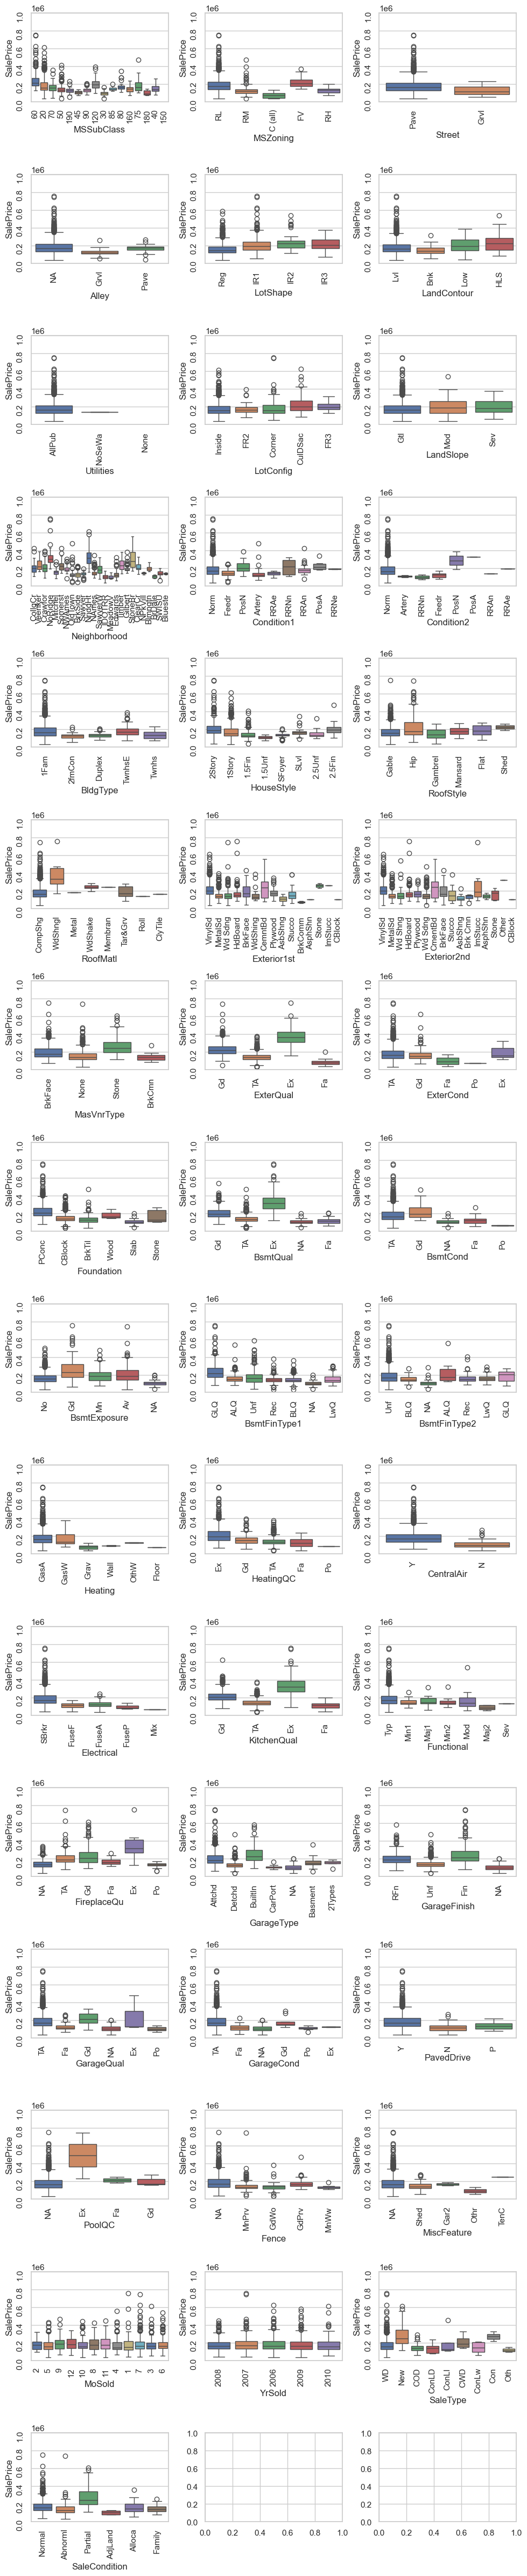

In [26]:
# categorical features
# ref: https://www.kaggle.com/code/ishmaelesma)eilrezaei/eda-and-feature-selection-house-price-prediction?cellIds=23&kernelSessionId=175684056
n_cols = 3
n_rows = math.ceil(len(cat_cols)/n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 3*n_rows))
for i, var in enumerate(cat_cols):
    
    row = i // n_cols
    col = i % n_cols

    data = pd.concat([y_prices, x_features], axis=1)
    sns.boxplot(x=var, y="SalePrice", data=data, ax=axes[row, col], palette=palette)
    axes[row, col].set_ylim(0, 1000000)  # Set y-axis limits
    axes[row, col].tick_params(rotation=90)
    
plt.tight_layout()
plt.show()

#### visualization of specific features relative to SalePrice

##### OverallQual vs OverallCond
- OverallQual
    - (evaluation) Quite obvious that as the overall rate value gets higher, the sale price goes up as well
- OverallCond
    - (evaluation) not as positively correlated as 'OverallQual'
    - condition marked as 5 pts has the most highest sale prices
- OverallQual vs OverallCond
    - the quality of the house has more correlation to the sale price than condition rates

(-0.5, 9.5, 0.0, 800000.0)

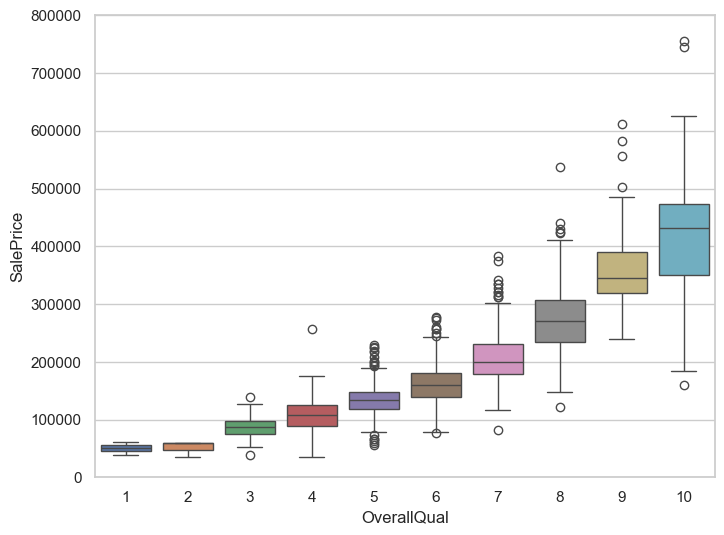

In [27]:
# boxplot for overallqual vs. saleprice
f, ax = plt.subplots(figsize=(8, 6))
data = pd.concat([y_prices, x_features], axis=1)
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data, palette=palette)
fig.axis(ymin=0, ymax=800000)

(-0.5, 8.5, 0.0, 800000.0)

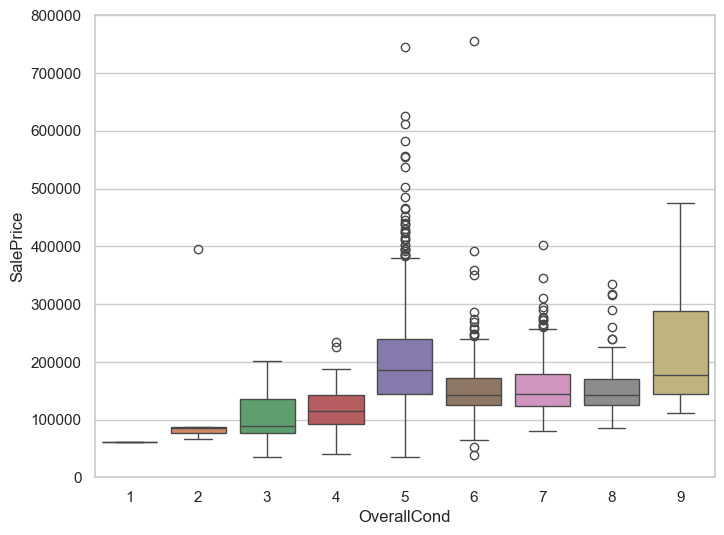

In [28]:
# boxplot for overallcond vs. saleprice
f, ax = plt.subplots(figsize=(8, 6))
data = pd.concat([y_prices, x_features], axis=1)
fig = sns.boxplot(x='OverallCond', y="SalePrice", data=data, palette=palette)
fig.axis(ymin=0, ymax=800000)

##### Neighborhood
- (evaluation) NoRidge, NridgHt, StoneBr seem to be the neighborhood with high sale priced housings.
- Also within the outliers, there are 5 housings with extremely high prices. 
- Let's have a look at those 5 houses.

(-0.5, 24.5, 0.0, 800000.0)

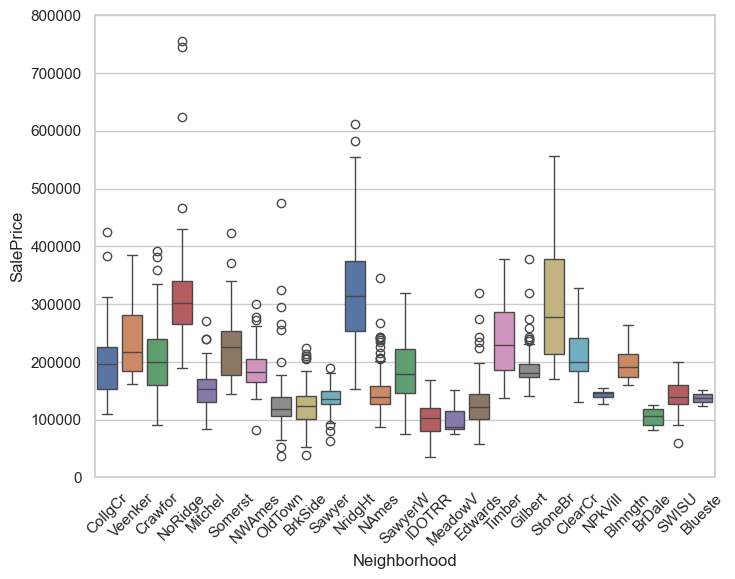

In [29]:
# boxplot for Neighborhood vs. saleprice
data = pd.concat([y_prices, x_features], axis=1)

f, ax = plt.subplots(figsize=(8, 6))
ax.tick_params(axis = 'x', rotation=45) #https://stackoverflow.com/a/26540821
fig = sns.boxplot(x='Neighborhood', y="SalePrice", data=data, palette=palette)
fig.axis(ymin=0, ymax=800000)

##### Closer EDA on the 5 houses with high sale prices

In [30]:
total_data = pd.concat([y_prices, x_features], axis=1)
total_data.head()

SalePrice MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   208500.0         60       RL         65.0     8450   Pave    NA      Reg   
1   181500.0         20       RL         80.0     9600   Pave    NA      Reg   
2   223500.0         60       RL         68.0    11250   Pave    NA      IR1   
3   140000.0         70       RL         60.0     9550   Pave    NA      IR1   
4   250000.0         60       RL         84.0    14260   Pave    NA      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0     NA    NA          NA   
1         Lvl    AllPub  ...           0        0     NA    NA          NA   
2         Lvl    AllPub  ...           0        0     NA    NA          NA   
3         Lvl    AllPub  ...           0        0     NA    NA          NA   
4         Lvl    AllPub  ...           0        0     NA    NA          NA   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      2    2008        WD         Normal  
1       0      5    2007        WD         Normal  
2       0      9    2008        WD         Normal  
3       0      2    2006        WD        Abnorml  
4       0     12    2008        WD         Normal  

[5 rows x 80 columns]

In [31]:
# find what is causing the high sale prices for housings
Fhouse_df = total_data[total_data['SalePrice']>580000].sort_values(by='SalePrice', ascending=False)
Fhouse_df

SalePrice MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
691    755000.0         60       RL        104.0    21535   Pave    NA   
1182   745000.0         60       RL        160.0    15623   Pave    NA   
1169   625000.0         60       RL        118.0    35760   Pave    NA   
898    611657.0         20       RL        100.0    12919   Pave    NA   
803    582933.0         60       RL        107.0    13891   Pave    NA   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
691       IR1         Lvl    AllPub  ...           0        0     NA     NA   
1182      IR1         Lvl    AllPub  ...           0      555     Ex  MnPrv   
1169      IR1         Lvl    AllPub  ...           0        0     NA     NA   
898       IR1         Lvl    AllPub  ...           0        0     NA     NA   
803       Reg         Lvl    AllPub  ...         192        0     NA     NA   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
691           NA       0      1    2007        WD         Normal  
1182          NA       0      7    2007        WD        Abnorml  
1169          NA       0      7    2006        WD         Normal  
898           NA       0      3    2010       New        Partial  
803           NA       0      1    2009       New        Partial  

[5 rows x 80 columns]

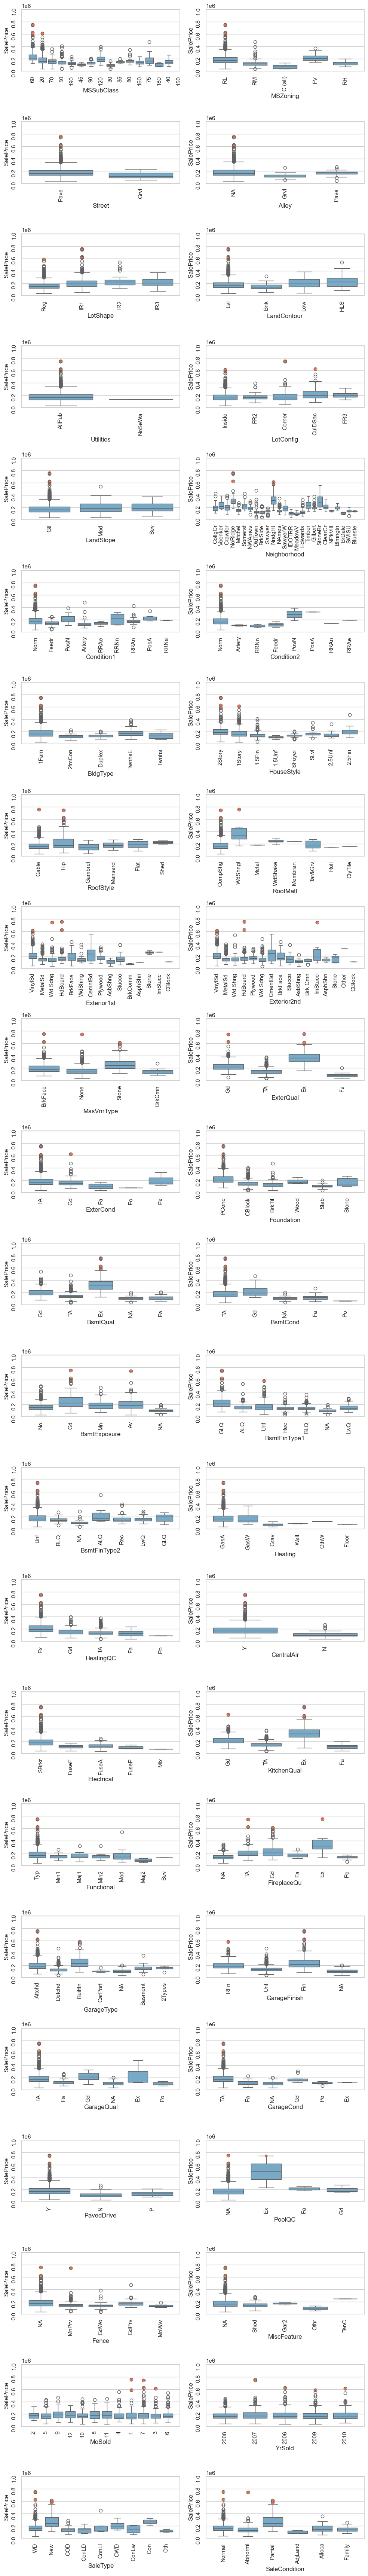

In [32]:
# visualization of categorical categories of the five houses
n_cols = 2
n_rows = math.ceil(len(cat_cols)/n_cols)

fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 3*n_rows))
for i, var in enumerate(cat_cols):
    
    row = i // n_cols
    col = i % n_cols

    sns.boxplot(x=var, y="SalePrice", data=total_data, 
                ax=ax[row, col], hue=False, palette='Blues')
    sns.scatterplot(x=var, y="SalePrice", data=Fhouse_df, ax=ax[row, col],
                   hue=False, palette='Reds')
    ax[row, col].set_ylim(0, 1000000)  # Set y-axis limits
    ax[row, col].tick_params(rotation=90)
    ax[row, col].get_legend().remove()
    
plt.tight_layout()
plt.show()

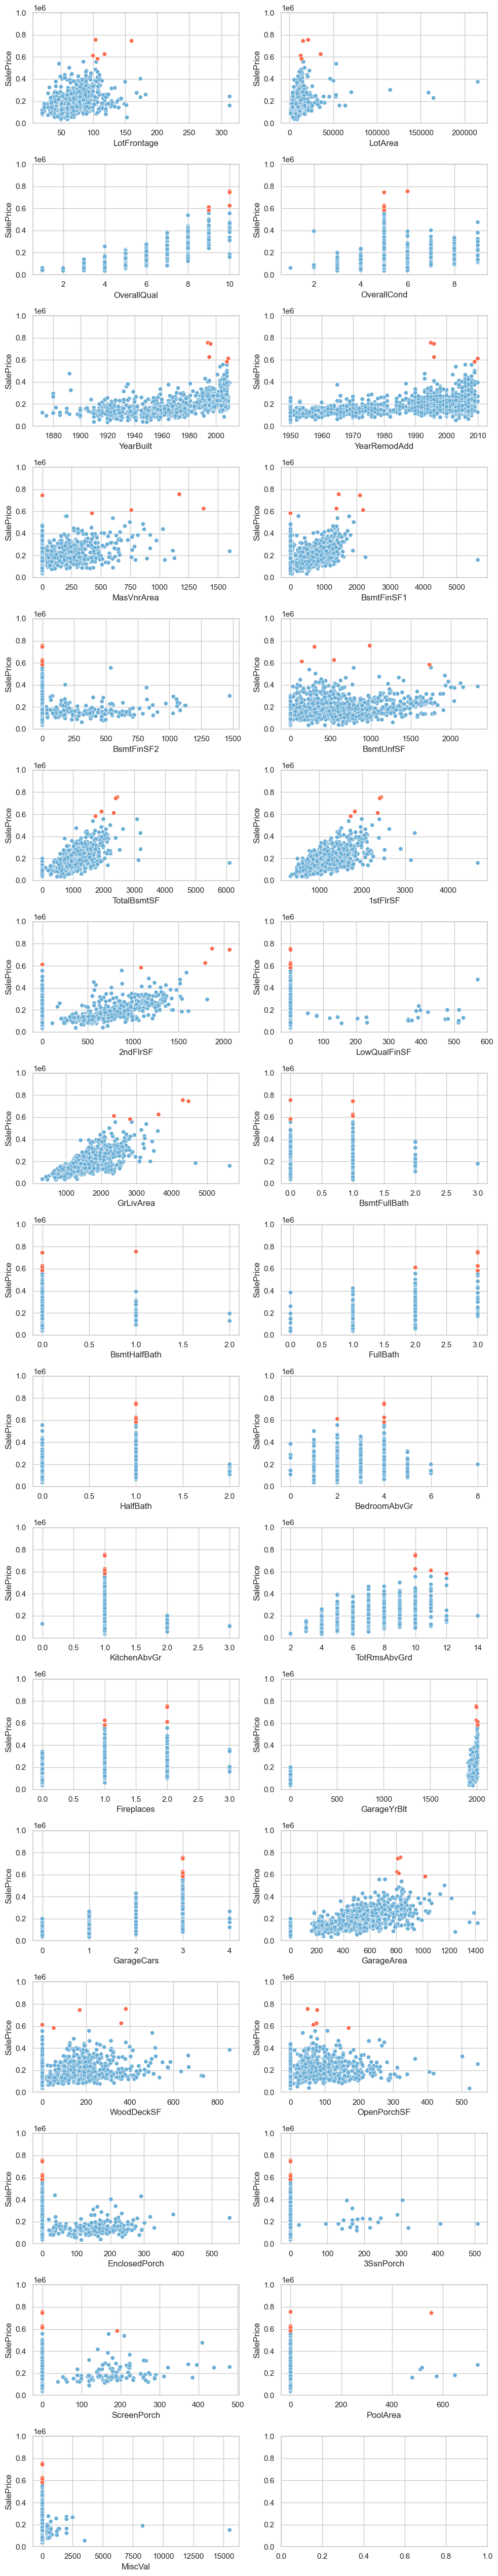

In [33]:
# visualization of numerical categories of the five houses
n_cols = 2
n_rows = math.ceil(len(num_cols)/n_cols)

fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 3*n_rows))
for i, var in enumerate(num_cols):
    
    row = i // n_cols
    col = i % n_cols

    sns.scatterplot(x=var, y="SalePrice", data=total_data, 
                ax=ax[row, col], hue=False, palette='Blues')
    sns.scatterplot(x=var, y="SalePrice", data=Fhouse_df, ax=ax[row, col], 
                    hue=False, palette='Reds')
    ax[row, col].set_ylim(0, 1000000)  # Set y-axis limits
    ax[row, col].get_legend().remove()
    
plt.tight_layout()
plt.show()

##### Evaluation of the five houses
- what doesn't seem influential
- what can be combined


#### Closer look at the top and the bottom 5% of the houses
- 99% and 1% percentile of sale prices

In [34]:
top = total_data['SalePrice'].quantile(0.99)
bottom = total_data['SalePrice'].quantile(0.01)

In [35]:
top_df = total_data[total_data['SalePrice']>=top]
bottom_df = total_data[total_data['SalePrice']<=bottom]

In [36]:
top_df.head()

SalePrice MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
178   501837.0         20       RL         63.0    17423   Pave    NA   
185   475000.0         75       RM         90.0    22950   Pave    NA   
440   555000.0         20       RL        105.0    15431   Pave    NA   
527   446261.0         60       RL         67.0    14948   Pave    NA   
591   451950.0         60       RL         97.0    13478   Pave    NA   

    LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
178      IR1         Lvl    AllPub  ...           0        0     NA     NA   
185      IR2         Lvl    AllPub  ...         410        0     NA  GdPrv   
440      Reg         Lvl    AllPub  ...         170        0     NA     NA   
527      IR1         Lvl    AllPub  ...           0        0     NA     NA   
591      IR1         Lvl    AllPub  ...           0        0     NA     NA   

    MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
178          NA       0      7    2009       New        Partial  
185          NA       0      6    2006        WD         Normal  
440          NA       0      4    2009        WD         Normal  
527          NA       0     11    2008       New        Partial  
591          NA       0      6    2009     ConLI         Normal  

[5 rows x 80 columns]

In [37]:
bottom_df.head()

SalePrice MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
30     40000.0         70  C (all)         50.0     8500   Pave  Pave   
375    61000.0         30       RL         65.0    10020   Pave    NA   
410    60000.0         20       RL         68.0     9571   Pave    NA   
495    34900.0         30  C (all)         60.0     7879   Pave    NA   
533    39300.0         20       RL         50.0     5000   Pave    NA   

    LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
30       Reg         Lvl    AllPub  ...           0        0     NA  MnPrv   
375      IR1         Low    AllPub  ...           0        0     NA     NA   
410      Reg         Lvl    AllPub  ...           0        0     NA     NA   
495      Reg         Lvl    AllPub  ...           0        0     NA   GdWo   
533      Reg         Low    AllPub  ...           0        0     NA     NA   

    MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
30           NA       0      7    2008        WD         Normal  
375          NA       0      3    2009        WD         Normal  
410          NA       0      6    2009       COD        Abnorml  
495          NA       0     11    2009        WD        Abnorml  
533          NA       0      1    2007        WD         Normal  

[5 rows x 80 columns]

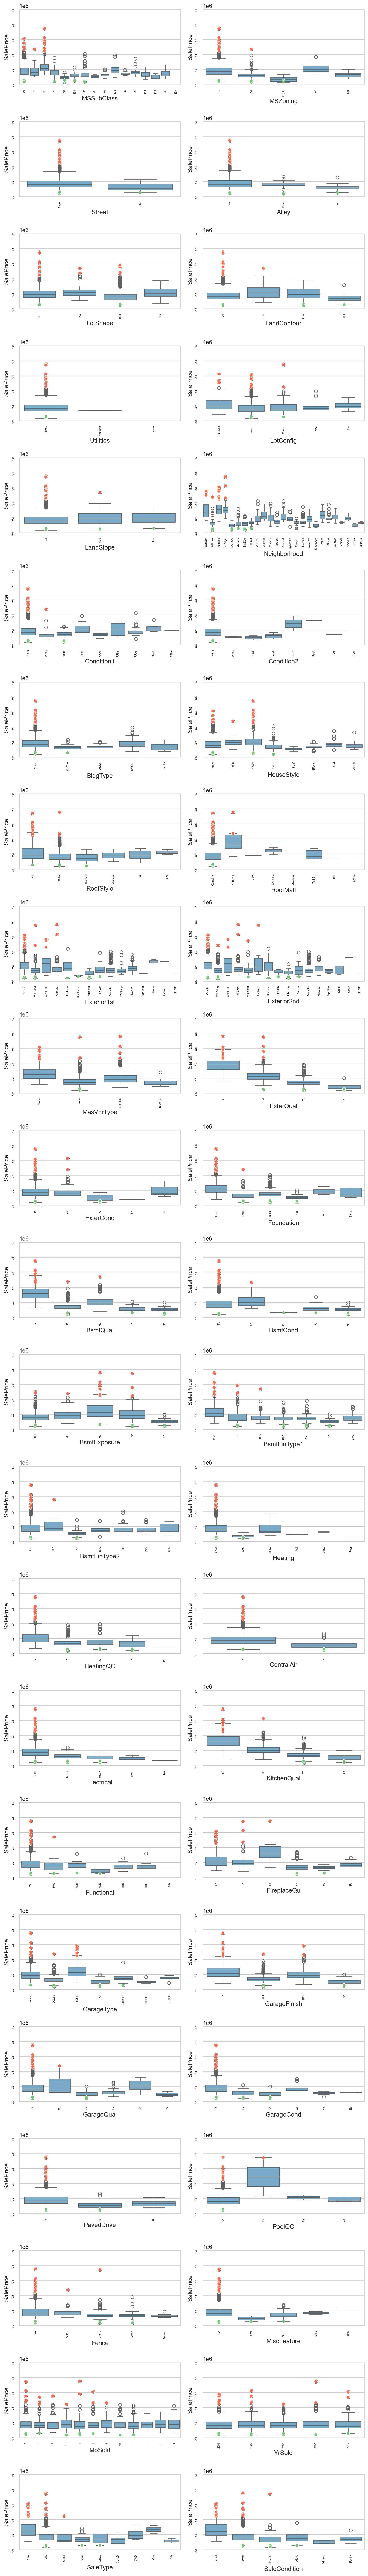

In [38]:
# visualization of categorical categories of the five houses
n_cols = 2
n_rows = math.ceil(len(cat_cols)/n_cols)

fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 3*n_rows), dpi=200)

for i, var in enumerate(cat_cols):
    
    row = i // n_cols
    col = i % n_cols

    sns.scatterplot(x=var, y="SalePrice", data=top_df, ax=ax[row, col],
                   hue=False, palette='Reds', zorder = 7)
    sns.scatterplot(x=var, y="SalePrice", data=bottom_df, ax=ax[row, col],
                   hue=False, palette='Greens', zorder = 7)
    sns.boxplot(x=var, y="SalePrice", data=total_data, 
                ax=ax[row, col], hue=False, palette='Blues')
    
    ax[row, col].set_ylim(0, 1000000)  # Set y-axis limits
    ax[row, col].tick_params(rotation=90, labelsize=5)
    ax[row, col].get_legend().remove()
    
plt.tight_layout()
plt.show()

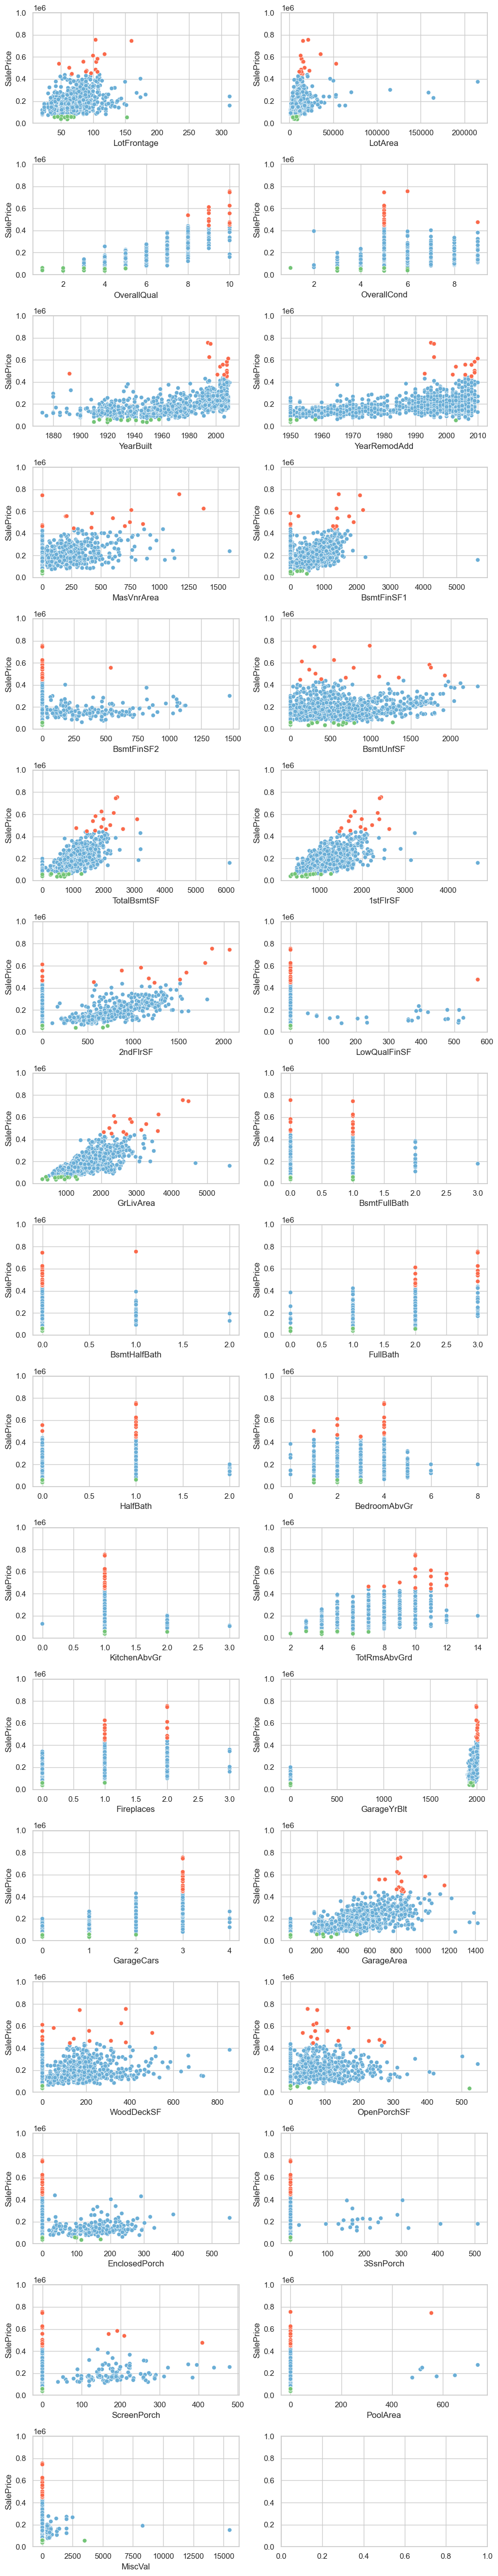

In [39]:
# visualization of numerical categories of the five houses
n_cols = 2
n_rows = math.ceil(len(num_cols)/n_cols)

fig, ax = plt.subplots(n_rows, n_cols, figsize=(10, 3*n_rows))
for i, var in enumerate(num_cols):
    
    row = i // n_cols
    col = i % n_cols

    sns.scatterplot(x=var, y="SalePrice", data=total_data, 
                ax=ax[row, col], hue=False, palette='Blues')
    sns.scatterplot(x=var, y="SalePrice", data=top_df, ax=ax[row, col], 
                    hue=False, palette='Reds')
    sns.scatterplot(x=var, y="SalePrice", data=bottom_df, ax=ax[row, col], 
                    hue=False, palette='Greens')
    ax[row, col].set_ylim(0, 1000000)  # Set y-axis limits
    ax[row, col].get_legend().remove()
    
plt.tight_layout()
plt.show()

#### Correlation Matrix
- to see the correlation between the features
- used as reference to whether to remove the feature or not with the EDA done above
<br>ref: https://www.kaggle.com/code/ishmaelesmaeilrezaei/eda-and-feature-selection-house-price-prediction
<br>ref: https://www.kaggle.com/code/tariksaglam/house-price-prediction-catboost-algorithm

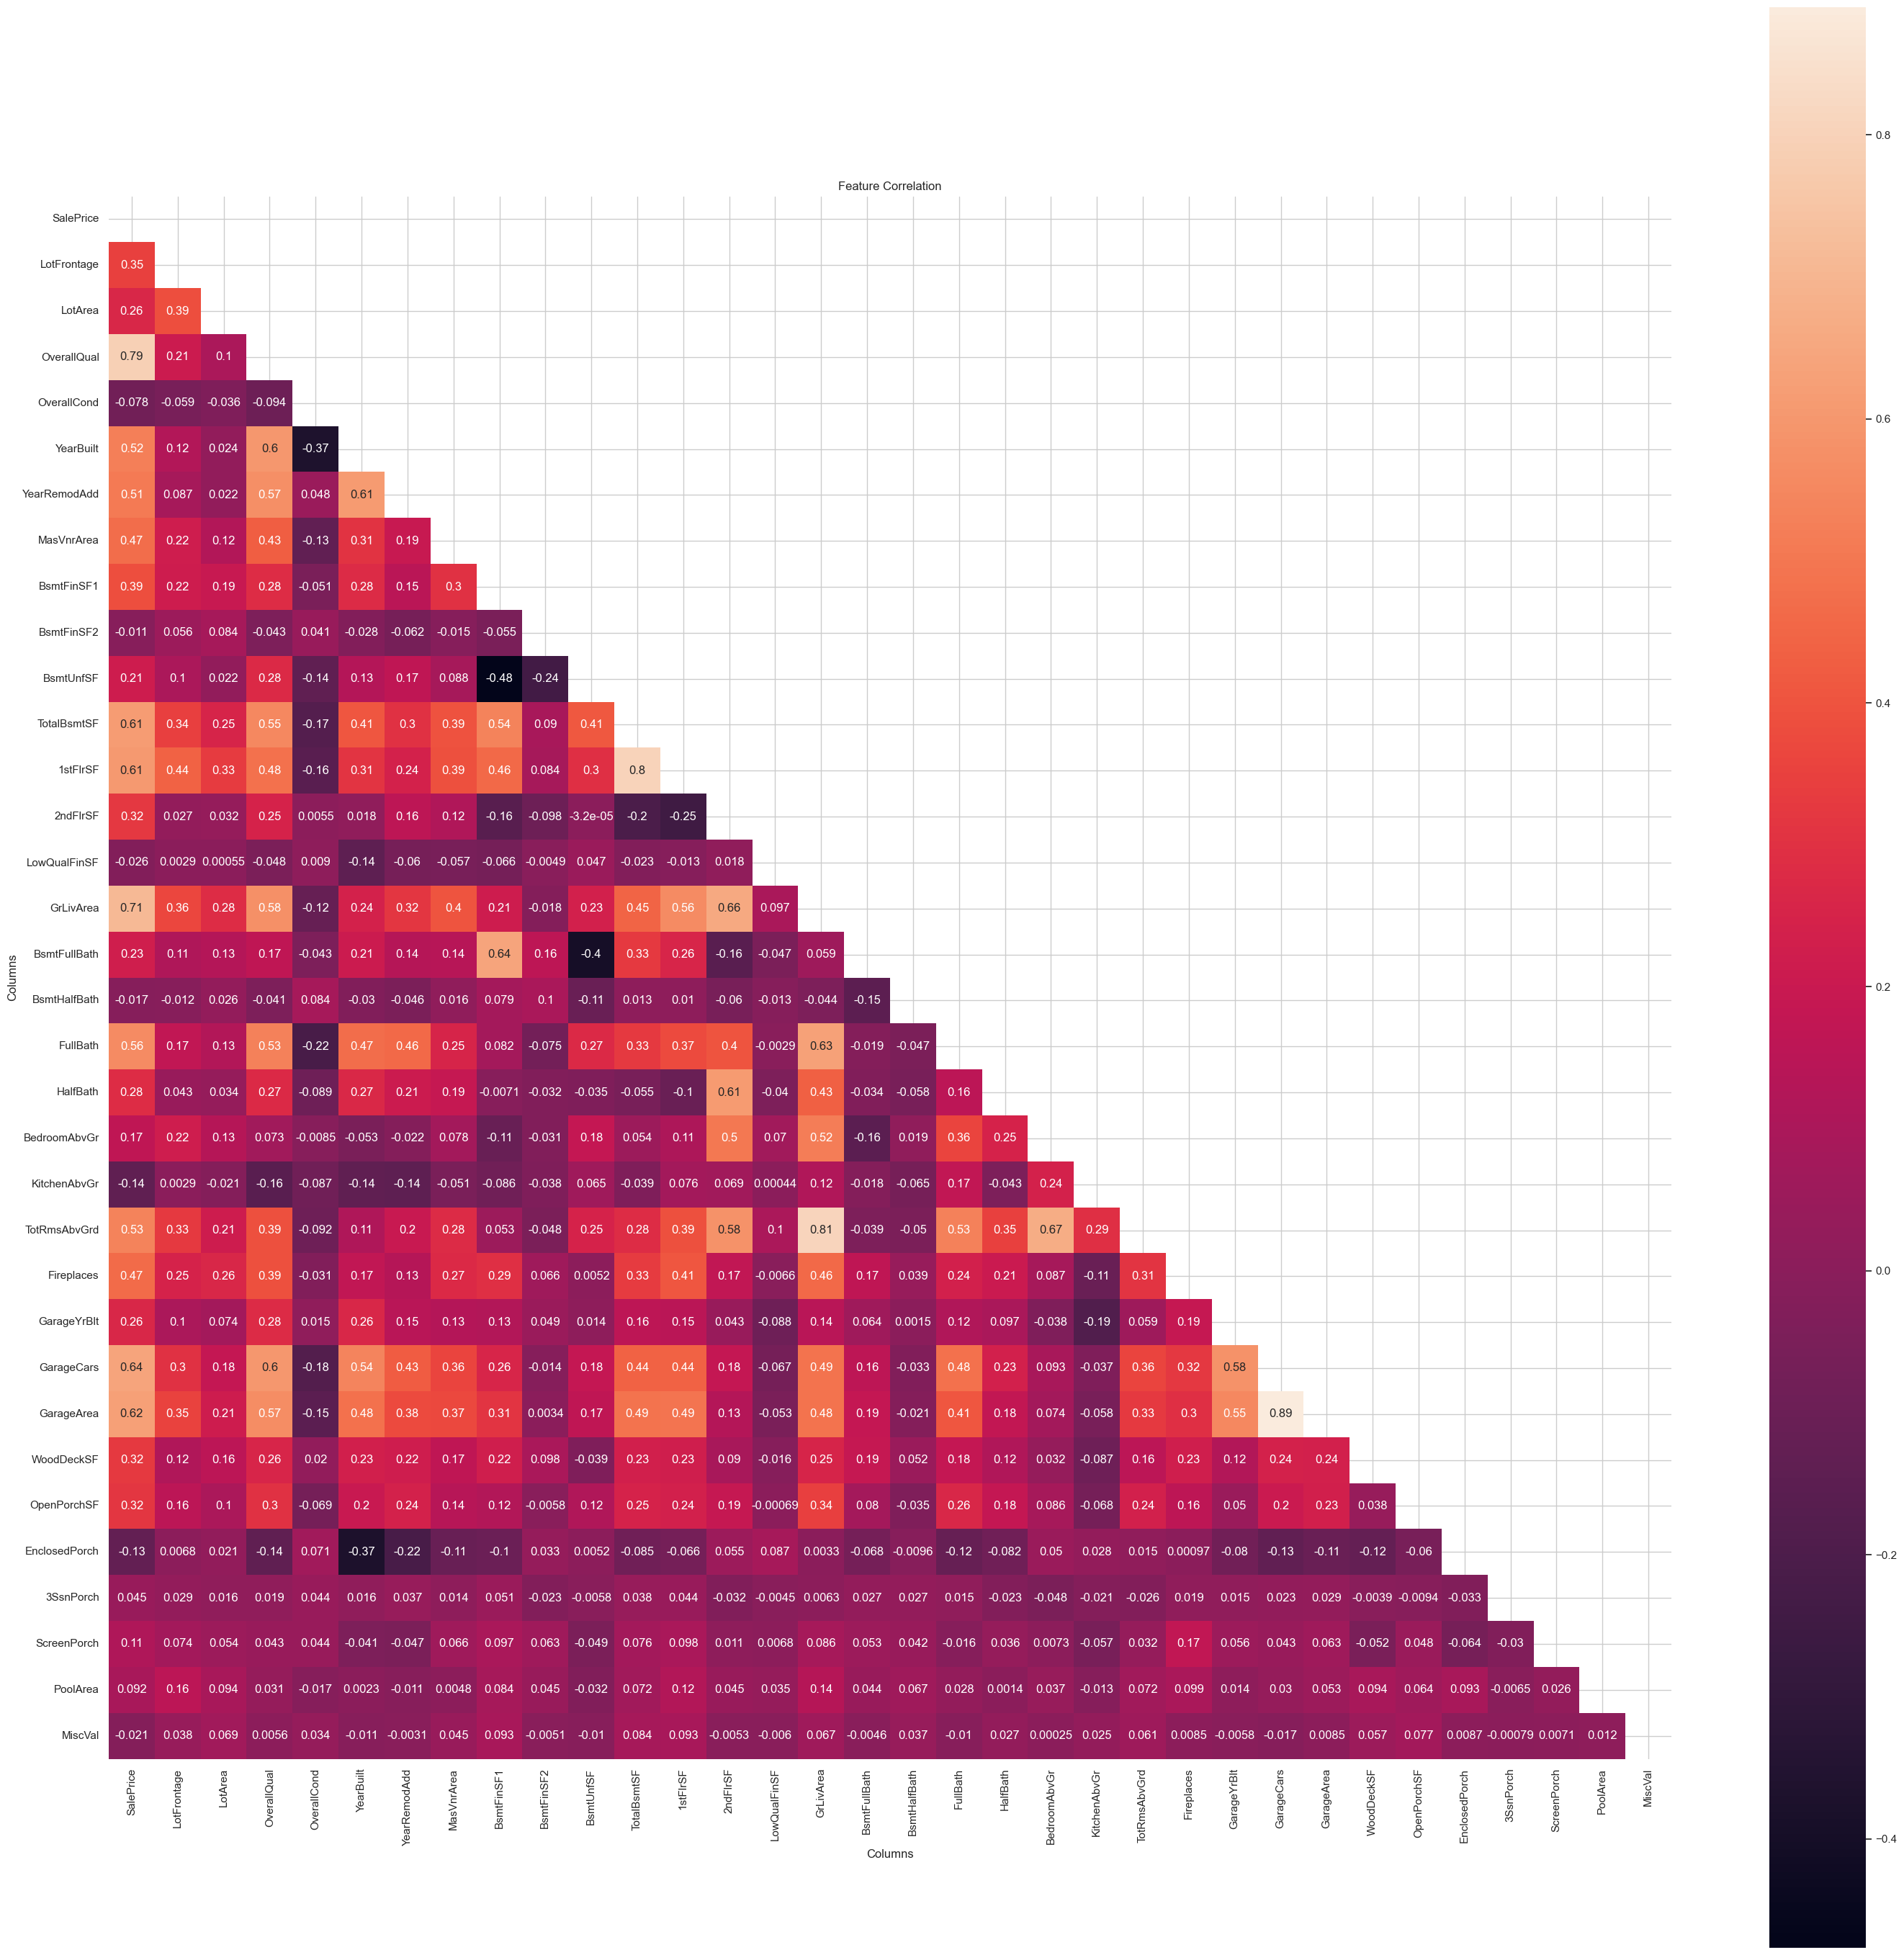

In [40]:
corr_matrix = total_data.select_dtypes(include = numerics).corr()
mask = np.zeros_like(corr_matrix, dtype = bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (35, 35))

sns.heatmap(corr_matrix,
           annot = True,
           square = True,
           fmt = ".2g",
           mask = mask,
           ax = ax).set(
title = "Feature Correlation", xlabel = "Columns", ylabel = "Columns")

ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({"xtick.bottom": True}, {"ytick.bottom": True})

In [41]:
corr_price = pd.DataFrame(total_data.select_dtypes(include='number').corr()["SalePrice"].drop("SalePrice").sort_values(ascending=False).tail(10))
corr_price.style.background_gradient(cmap='winter')

#### Feature Engineering
- combining features with duplicated meaning (creating new features)
- "dropping" unnecessary features

1. the 10 features with the lowest correlation value (numerical)
2. among these features there seems to be a parent feature that could be combined together
    - TotSF = 1stFlrSF + 2ndFlrSF
    - TotBth = FullBath + HalfBath + BsmtFullBath + BsmtHalfBath
    - TotPorchSF = OpenPorchSF + 3SsnPorch + EnclosedPorch + ScreenPorch + WoodDeckSF
3. Deleting features with duplicated meaning or with low correlation
    - for example, "BsmtFinSF2(Type 2 finished square feet)" feature has low correlation where as "BsmtFinSF1" has high correlation. But both features present the total squart feet of the basement(s). Also, there already is a feature called "TotalBsmtSF" so the "BsmtFinSF1 + BsmtFinSF2" can be deleted.
    - Same for the following features
       - BsmtFinSF1
       - BsmtFinSF2
       - MiscVal
       - OverallCond
       - KitchenAbvGr
       - BedroomAbvGr
       - LowQualFinSF
       - all the combines features
    - for Categorical features, the following are deleted
       - PoolQC
       - Street
       - Utilities
4. Creating new features with simpler feature
    - Since "PoolArea" features has low correlation, instead of specific number in SF, it can be simplified as whether the house has a pool or not
    - Same for the following features
       - 2ndFlrSF

In [42]:
# combining features / creating new ones
x_features['TotSF'] = x_features['1stFlrSF'] + x_features['2ndFlrSF']

x_features['TotBth'] = (x_features['FullBath'] + (0.5 * x_features['HalfBath']) +
                               x_features['BsmtFullBath'] + (0.5 * x_features['BsmtHalfBath']))

x_features['TotPorchSF'] = (x_features['OpenPorchSF'] + x_features['3SsnPorch'] +
                              x_features['EnclosedPorch'] + x_features['ScreenPorch'] +
                              x_features['WoodDeckSF'])

In [43]:
# creating new features
# simplifying the features
x_features['PoolNA'] = x_features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
x_features['2ndFlrNA'] = x_features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)

In [44]:
'FullBath' in x_features.columns

True

In [45]:
# Dropping unnecessary features
# according to the EDA above, the following features seem irrelavant

# dropping the combined features and features with duplicated meaning and low correlation
drop_col1 = ['PoolArea', 'BsmtFinSF1', 'BsmtFinSF2', 'MiscVal', 'OverallCond', 'KitchenAbvGr',
            'BedroomAbvGr', 'LowQualFinSF', 'PoolQC', 'Street', 'Utilities', '1stFlrSF',
            '2ndFlrSF', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath', 
            'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF']

for col in drop_col1:
    x_features.drop(col, axis=1, inplace = True)

##### After feature engineering
- we have a total of 62 features
- overall Correlation Matrix

In [46]:
x_features.shape, x_features.columns

((2919, 62),
 Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
        'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
        'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt',
        'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
        'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
        'Electrical', 'GrLivArea', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
        'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
        'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
        'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
        'SaleCondition', 'TotSF', 'TotBth', 'TotPorchSF', 'PoolNA', '2ndFlrNA'],
       dtype='object'))

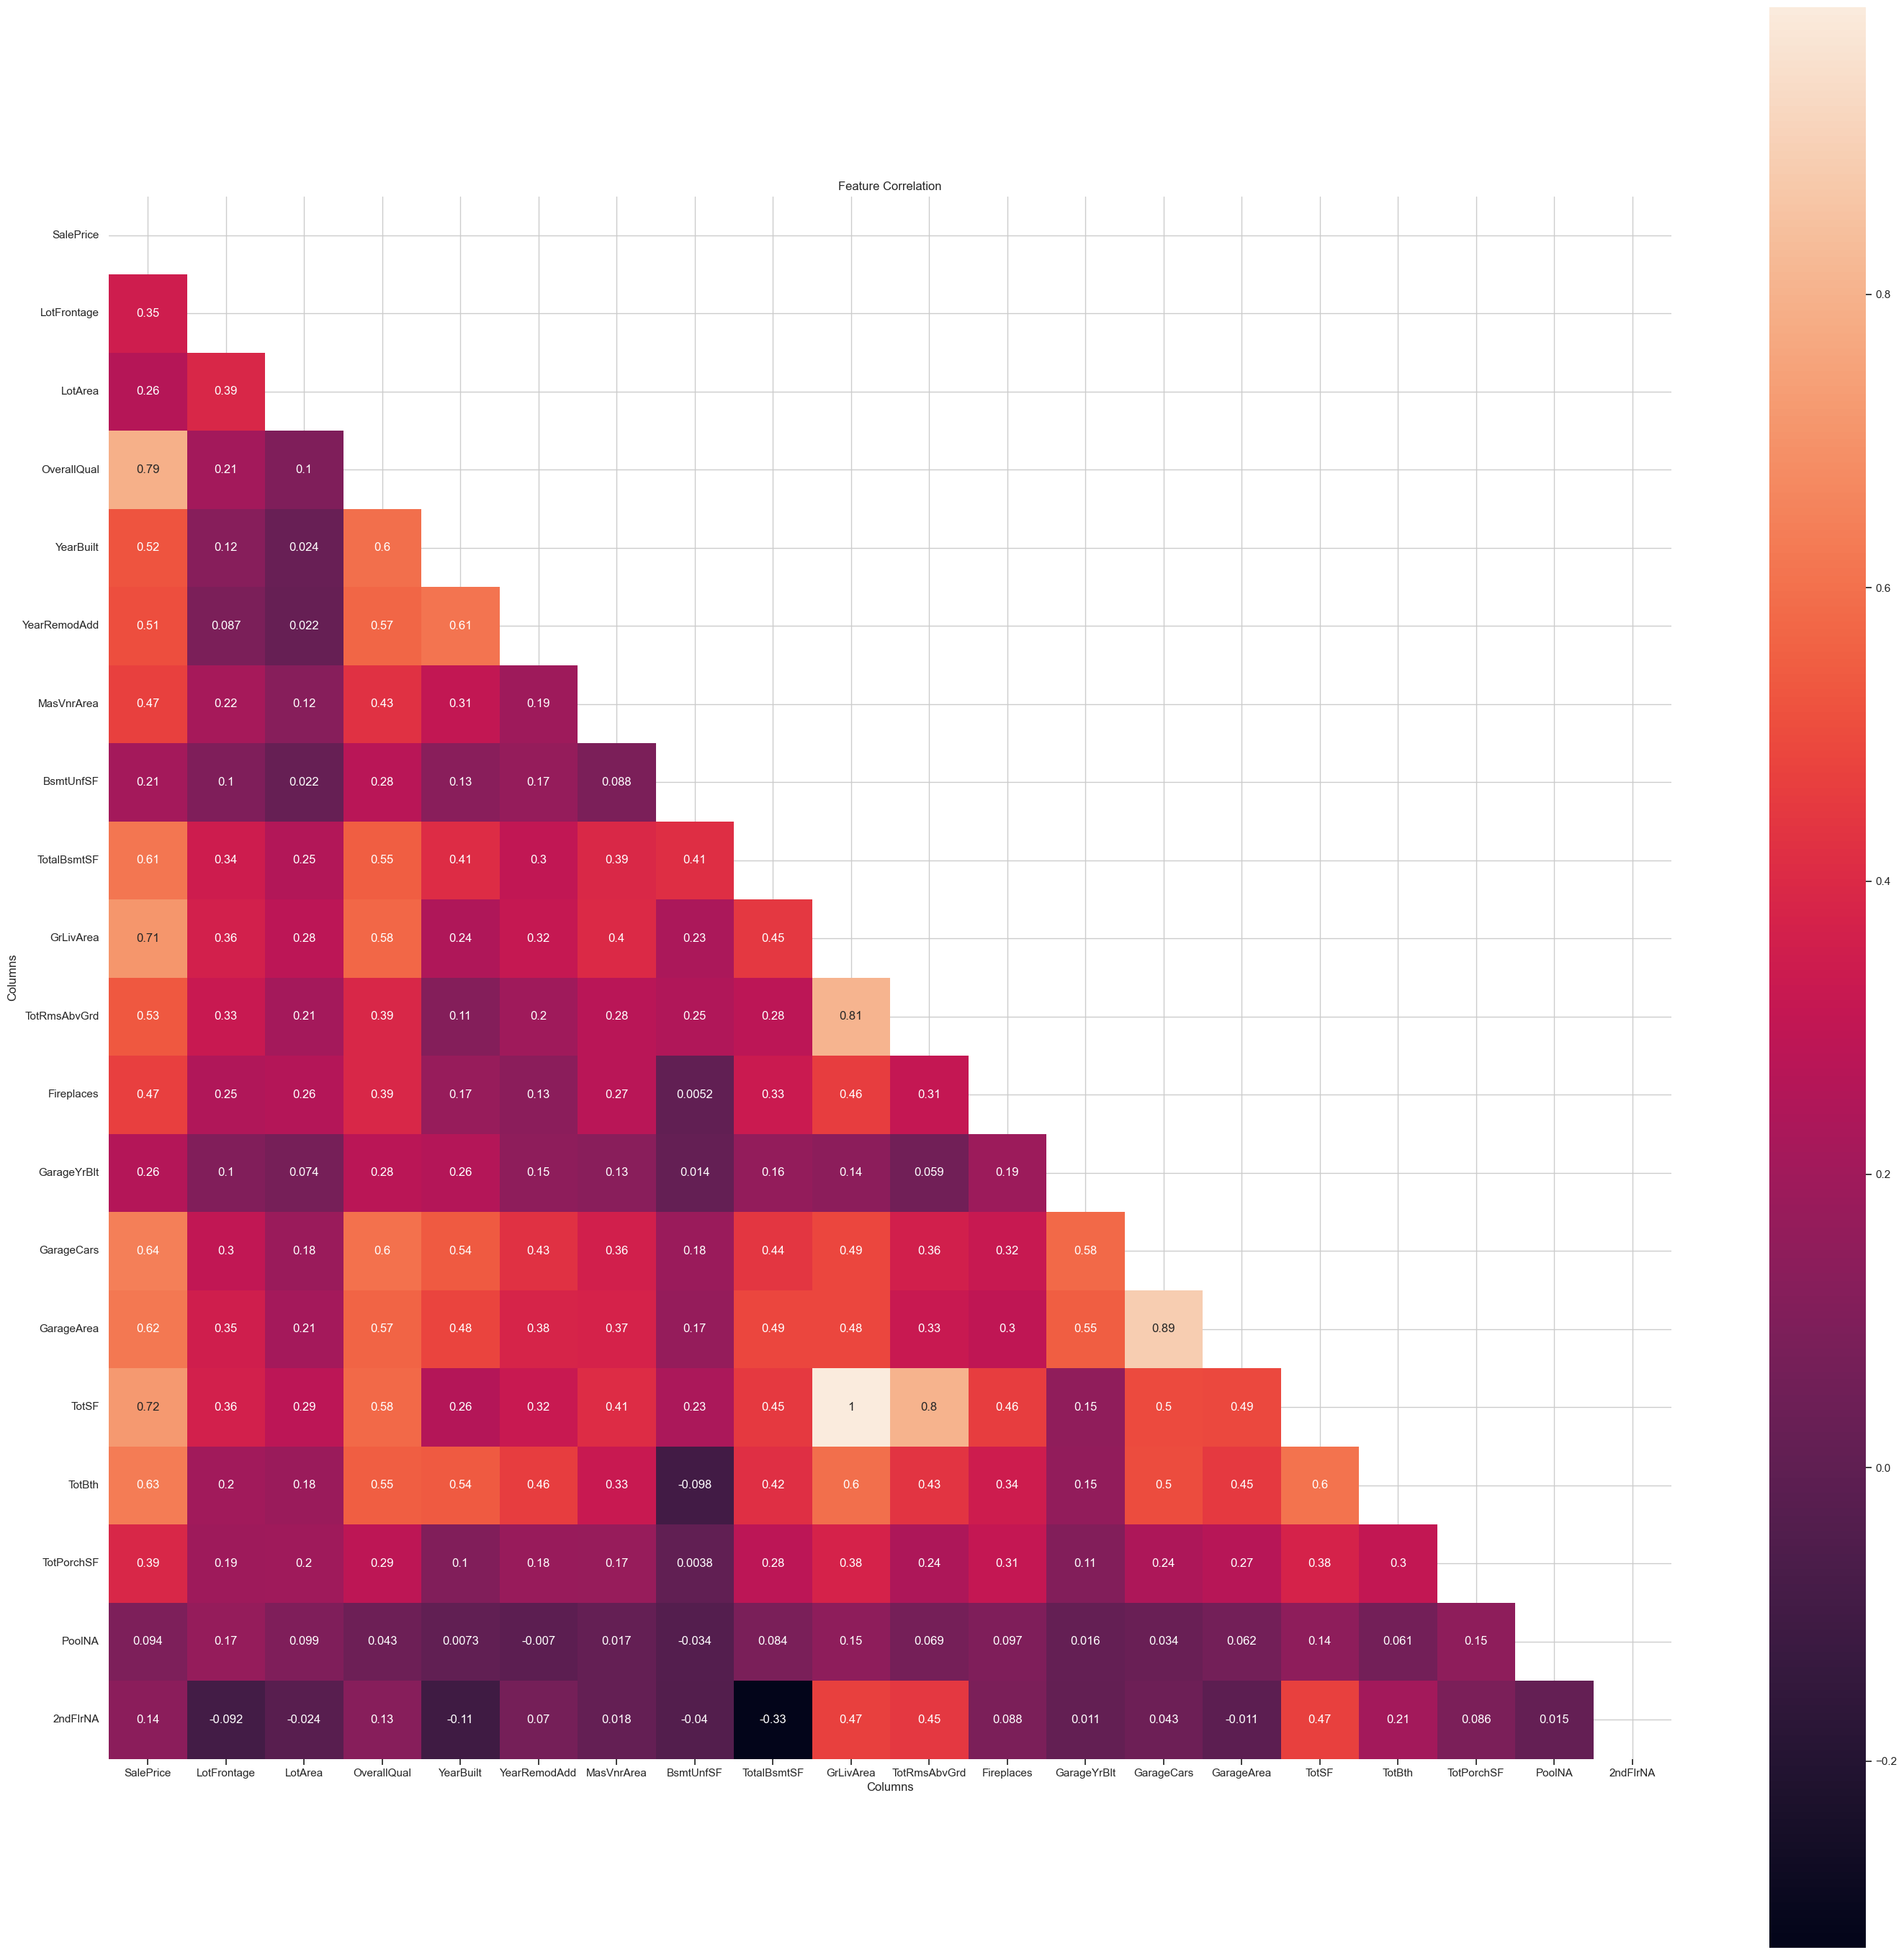

In [47]:
data = pd.concat([y_prices, x_features], axis=1)
corr_matrix = data.select_dtypes(include = numerics).corr()
mask = np.zeros_like(corr_matrix, dtype = bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize = (35, 35))

sns.heatmap(corr_matrix,
           annot = True,
           square = True,
           fmt = ".2g",
           mask = mask,
           ax = ax).set(
title = "Feature Correlation", xlabel = "Columns", ylabel = "Columns")

ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({"xtick.bottom": True}, {"ytick.bottom": True})

#### Saving Proprocessed dataset

In [48]:
# separating the provided "test" dataset (the ones without the y_price data)
train_features = x_features.iloc[:len(y_prices), :]
test_features = x_features.iloc[len(y_prices):, :]

train_features.shape, test_features.shape, y_prices.shape

((1460, 62), (1459, 62), (1460,))

In [49]:
train_data = pd.concat([train_features, y_prices], axis = 1)

In [50]:
train_save_dir = './preprocessed_train.csv'
test_save_dir = './preprocessed_test.csv'

In [51]:
train_data.to_csv(train_save_dir, index=False)  
test_features.to_csv(test_save_dir, index=False)  